In [356]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [357]:
dados = pd.read_csv('dadosacoes.csv')

In [358]:
dados.head() 

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


C:\Users\dsadm\AppData\Local\Temp\ipykernel_16356\2319919545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nome ação', y='preço ação R$', data=dados, palette='Set1')  # Adicionando uma paleta de cores


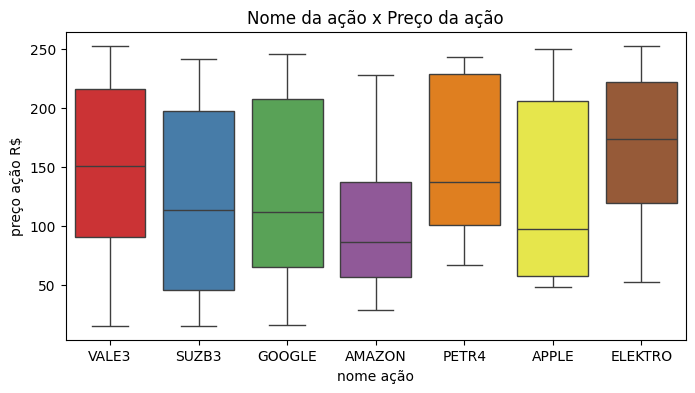

C:\Users\dsadm\AppData\Local\Temp\ipykernel_16356\2319919545.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=dados, palette='Set1')  # Usando uma paleta diferente


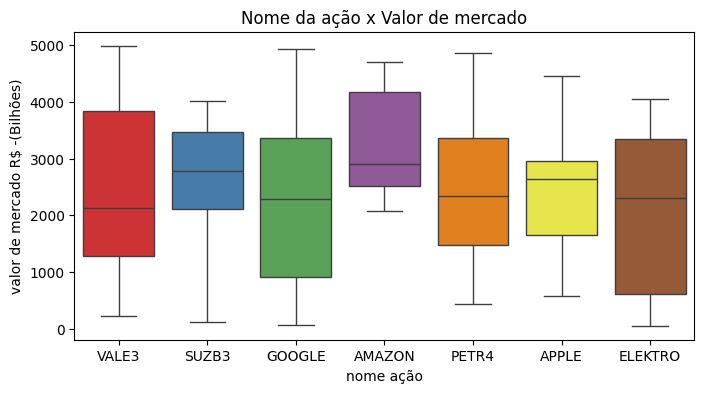

In [359]:
# Visualização do preço das ações por ativo com cores diferentes
plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='preço ação R$', data=dados, palette='Set1')  # Adicionando uma paleta de cores
plt.title('Nome da ação x Preço da ação')
plt.show()

# Analisando o valor de mercado dos ativos com cores variadas
plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=dados, palette='Set1')  # Usando uma paleta diferente
plt.title('Nome da ação x Valor de mercado')
plt.show()


In [360]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [361]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [362]:
# Primeiramente, vamos verificar se há algum valor ausente nos dados
dados.isnull().sum()

# Caso existam valores ausentes, será feita a substituição pelos valores médios de cada coluna
dados['valor de mercado R$ -(Bilhões)'].fillna(dados['valor de mercado R$ -(Bilhões)'].mean(), inplace=True)
dados['qtde cotas'].fillna(dados['qtde cotas'].mean(), inplace=True)
dados['preço ação R$'].fillna(dados['preço ação R$'].mean(), inplace=True)

# Verificando novamente os dados para garantir que não restaram valores ausentes
dados.isnull().sum()

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [363]:
# Realizando a conversão das variáveis categóricas em variáveis binárias (dummies) para a coluna 'nome ação'
dados = pd.get_dummies(dados, columns=['nome ação'], drop_first=True)

# Exibindo as primeiras linhas para conferir se a transformação foi realizada corretamente
dados.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [364]:
# Extraindo apenas as colunas com dados numéricos relevantes para a análise
dados_numericos = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Aplicando a normalização para padronizar os valores das variáveis
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)

# Convertendo os dados normalizados em um DataFrame para facilitar o manuseio posterior
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados_numericos.columns)

# Exibindo as primeiras linhas do DataFrame normalizado para inspeção
dados_normalizados.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,0.772901,-0.256419,-0.215567
1,-0.602986,0.694636,0.456955
2,0.385515,-0.402735,0.274259
3,-1.070520,-0.658788,0.848240
4,1.013347,-1.573264,0.389343


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


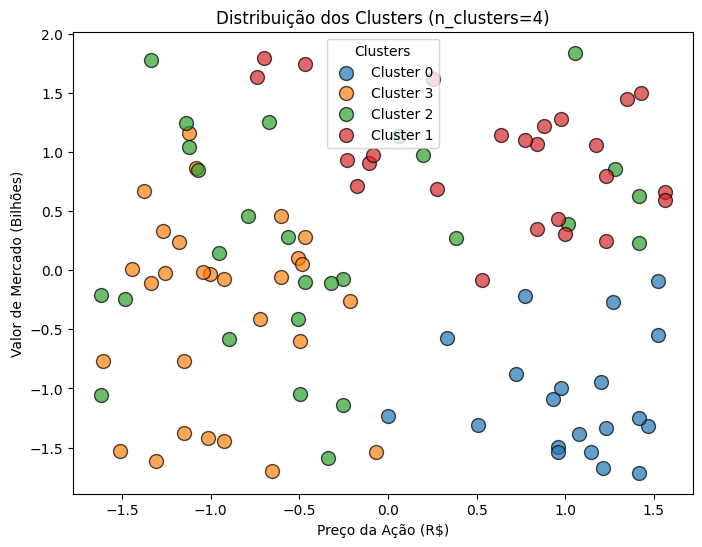

In [365]:
# Inicializando o modelo K-means com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Atribuindo os clusters previstos aos dados normalizados
dados_normalizados['Cluster_4'] = kmeans_4.fit_predict(dados_normalizados)

# Preparando a visualização dos clusters identificados
plt.figure(figsize=(8, 6))

# Para cada cluster identificado, vamos plotar os pontos com cores distintas
for i, cluster in enumerate(dados_normalizados['Cluster_4'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_4'] == cluster]
    
    # Usando a paleta de cores 'tab10' para diferenciar os clusters
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

# Ajustando título e rótulos
plt.title('Distribuição dos Clusters (n_clusters=4)')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões)')

# Adicionando a legenda para identificar os clusters
plt.legend(title='Clusters')
plt.show()

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


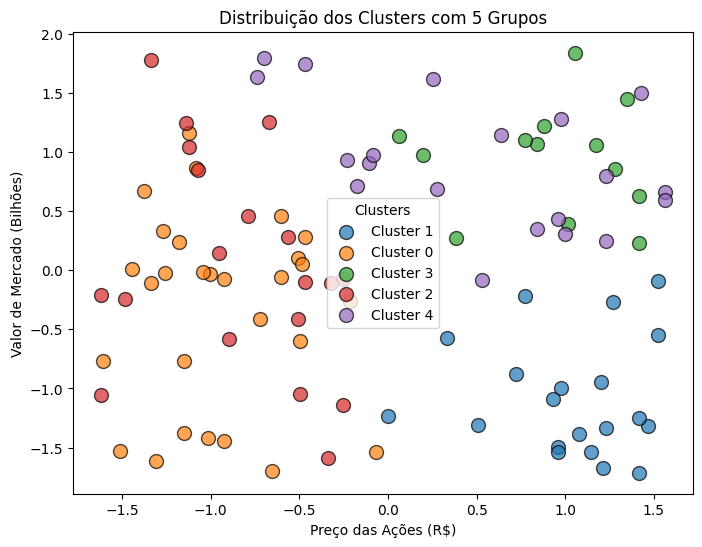

In [366]:
# Definindo o número de clusters como 5 para o K-means
kmeans_5 = KMeans(n_clusters=5, random_state=42)

# Aplicando o modelo K-means e atribuindo os clusters aos dados normalizados
dados_normalizados['Cluster_5'] = kmeans_5.fit_predict(dados_normalizados)

# Preparando a plotagem para visualizar a distribuição dos clusters
plt.figure(figsize=(8, 6))

# Iterando por cada cluster para plotar os pontos com cores distintas
for i, cluster in enumerate(dados_normalizados['Cluster_5'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_5'] == cluster]
    
    # Atribuindo cores usando a paleta tab10 para diferenciar os clusters
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

# Ajustando o título e os rótulos dos eixos para maior clareza
plt.title('Distribuição dos Clusters com 5 Grupos')
plt.xlabel('Preço das Ações (R$)')
plt.ylabel('Valor de Mercado (Bilhões)')

# Adicionando uma legenda para identificar os clusters visualmente
plt.legend(title='Clusters')
plt.show()

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


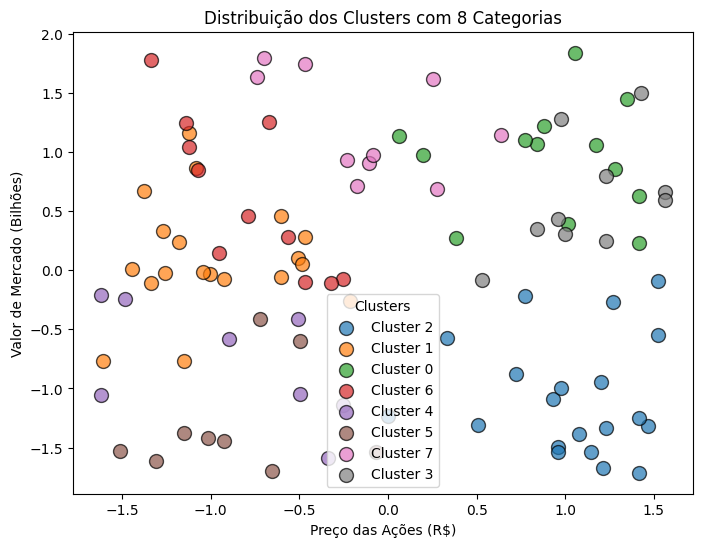

In [367]:
# Inicializando o K-means com 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)

# Realizando a previsão dos clusters e adicionando ao DataFrame
dados_normalizados['Cluster_8'] = kmeans_8.fit_predict(dados_normalizados)

# Preparando a visualização para os clusters identificados
plt.figure(figsize=(8, 6))

# Percorrendo os diferentes clusters e plotando os pontos com cores distintas
for i, cluster in enumerate(dados_normalizados['Cluster_8'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_8'] == cluster]
    
    # Utilizando a paleta de cores 'tab10' para atribuir uma cor única para cada cluster
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

# Ajustando o título e rótulos dos eixos para melhor interpretação
plt.title('Distribuição dos Clusters com 8 Categorias')
plt.xlabel('Preço das Ações (R$)')
plt.ylabel('Valor de Mercado (Bilhões)')

# Adicionando a legenda para identificar facilmente os clusters
plt.legend(title='Clusters')
plt.show()

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

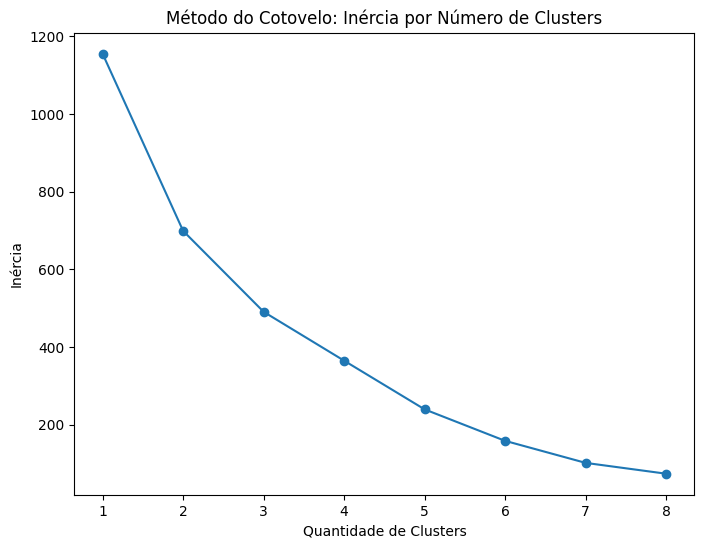

In [368]:
# Aplicando o Método do Cotovelo para determinar o número ideal de clusters
inertia = []

# Testando diferentes números de clusters (de 1 a 8) para calcular a inércia
for n in range(1, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(dados_normalizados)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico para visualizar a inércia em função do número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o')

# Adicionando título e rótulos aos eixos
plt.title('Método do Cotovelo: Inércia por Número de Clusters')
plt.xlabel('Quantidade de Clusters')
plt.ylabel('Inércia')

# Exibindo o gráfico
plt.show()

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

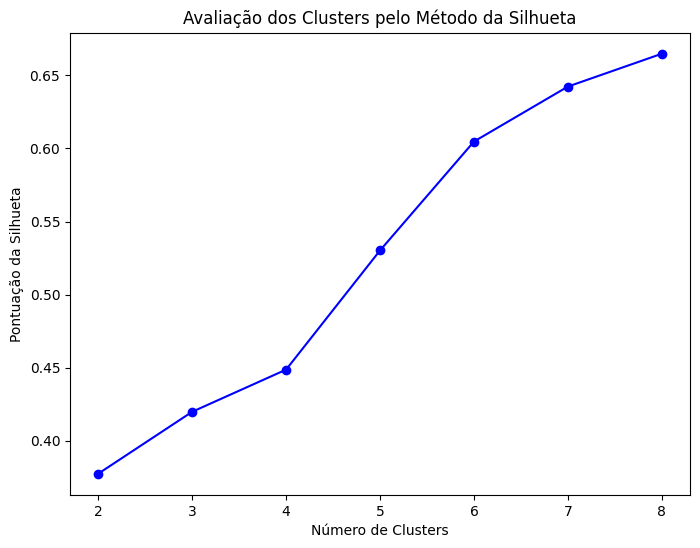

In [369]:
# Calculando a pontuação da silhueta para diferentes números de clusters
silhouette_scores = []

# Testando com valores de clusters de 2 a 8 (silhueta não é aplicável para 1 cluster)
for n in range(2, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(dados_normalizados)
    
    # Calculando a média da pontuação da silhueta para o número atual de clusters
    silhouette_avg = silhouette_score(dados_normalizados, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Gerando o gráfico para comparar a pontuação da silhueta por número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='b')

# Ajustando título e rótulos do gráfico
plt.title('Avaliação dos Clusters pelo Método da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')

# Exibindo o gráfico
plt.show()

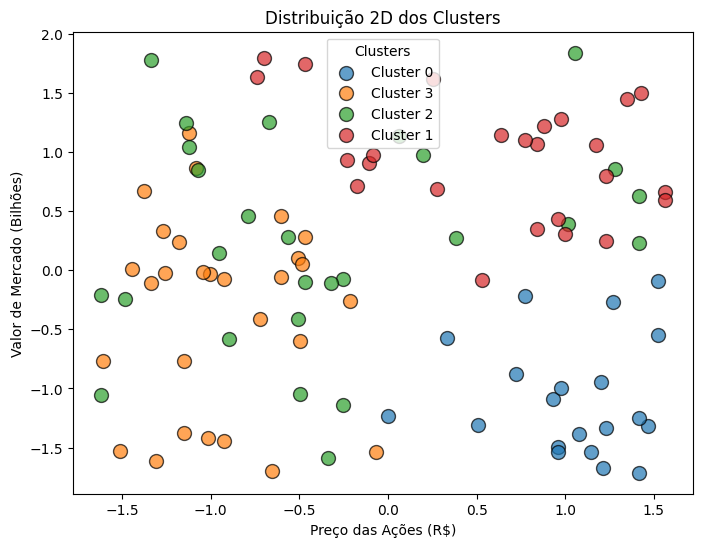

In [370]:
# Criando a figura para visualização dos clusters em 2D
plt.figure(figsize=(8, 6))

# Loop para percorrer os diferentes clusters e atribuir cores distintas
for i, cluster in enumerate(dados_normalizados['Cluster_4'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_4'] == cluster]
    
    # Usando a paleta 'tab10' para atribuir uma cor única a cada cluster
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

# Adicionando título e rótulos aos eixos para melhorar a interpretação
plt.title('Distribuição 2D dos Clusters')
plt.xlabel('Preço das Ações (R$)')
plt.ylabel('Valor de Mercado (Bilhões)')

# Incluindo a legenda para facilitar a identificação dos clusters
plt.legend(title='Clusters')

# Exibindo a visualização
plt.show()

In [371]:
from sklearn.cluster import KMeans

# Escolhendo as colunas que serão utilizadas para a análise de agrupamento
X = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Inicializando o modelo KMeans com 4 clusters (podendo ajustar para 5 ou 8, conforme necessário)
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustando o modelo aos dados e criando uma nova coluna no DataFrame para armazenar os rótulos dos clusters
dados['Cluster_4'] = kmeans.fit_predict(X)

# Exibindo as primeiras linhas do DataFrame com os clusters atribuídos
print(dados.head())

   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  Cluster_4  
0             True      

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


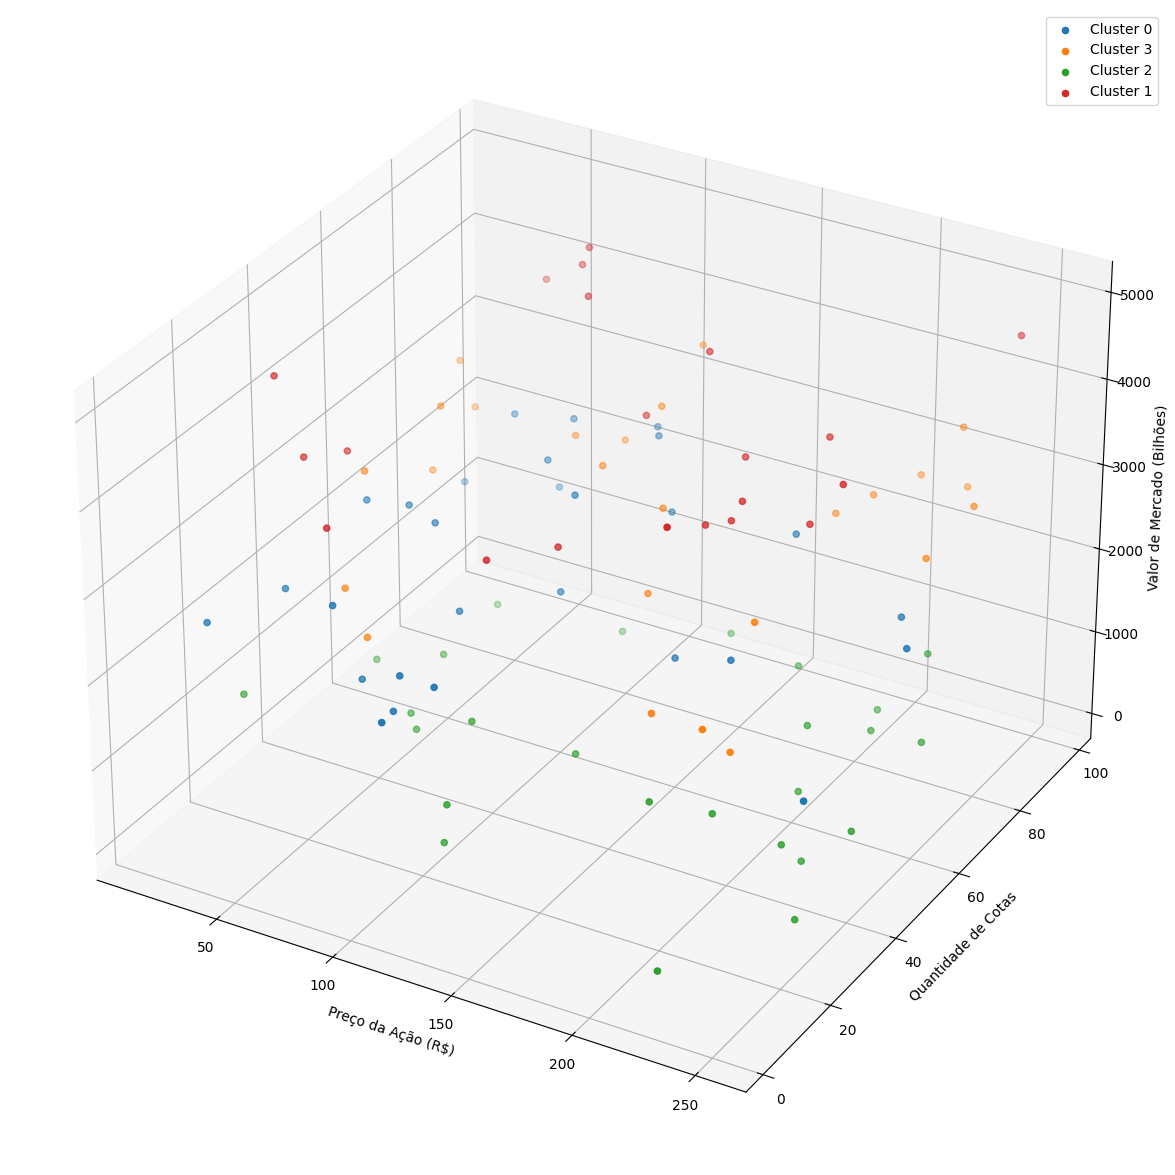

In [372]:
# Criando um gráfico 3D para visualização dos clusters
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Extraindo os valores únicos dos clusters presentes nos dados
clusters = dados['Cluster_4'].unique()

# Percorrendo cada cluster e plotando suas observações com cores diferenciadas
for i, cluster in enumerate(clusters):
    cluster_data = dados[dados['Cluster_4'] == cluster]
    
    # Utilizando a paleta 'tab10' para garantir que cada cluster tenha uma cor distinta
    ax.scatter(cluster_data['preço ação R$'], 
               cluster_data['qtde cotas'], 
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10))

# Definindo os rótulos dos eixos X, Y e Z para a visualização 3D
ax.set_xlabel('Preço da Ação (R$)')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')

# Inserindo a legenda para identificar os clusters de forma clara
plt.legend()

# Exibindo o gráfico gerado
plt.show()